# US Wildfires Data Analysis (Beginner Pandas Project)
## What's in?
## 1. How to read a NON CSV file(sqlite)
## 2. Beginner friendly practice using pandas(info(), describe(),...)
## 3. Simple Exploration and Visulaization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/188-million-us-wildfires/FPA_FOD_20170508.sqlite


# SECTION 1
## 1. How to read a NON CSV file(sqlite)

In [2]:
import sqlite3
db_path = "/kaggle/input/188-million-us-wildfires/FPA_FOD_20170508.sqlite"

conn = sqlite3.connect(db_path)


# Viewing tables

In [3]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)

tables

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


# Selecting Fires table for analysis

In [4]:
fires_df = pd.read_sql_query("SELECT * FROM Fires", conn)
fires_df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


# Understanding file size using "shape" attribute

In [5]:
fires_df.shape

(1880465, 39)

So, our dataset has 1880465 rows and 39 columns!

Let's view what are the columns present in our dataset

In [6]:
fires_df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

That's huge! Actually we don't need all of the columns. 

In [7]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [8]:
fires_df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,9.402330e+05,5.484020e+07,2.003710e+03,2.453064e+06,1.647191e+02,5.979037e+00,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01,1.059658e+01
std,5.428436e+05,1.011963e+08,6.663099e+00,2.434573e+03,9.003891e+01,3.483860e+00,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01,4.404662e+00
min,1.000000e+00,1.000000e+00,1.992000e+03,2.448622e+06,1.000000e+00,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02,0.000000e+00
25%,4.701170e+05,5.055000e+05,1.998000e+03,2.451084e+06,8.900000e+01,3.000000e+00,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02,8.000000e+00
50%,9.402330e+05,1.067761e+06,2.004000e+03,2.453178e+06,1.640000e+02,5.000000e+00,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01,1.400000e+01
75%,1.410349e+06,1.910639e+07,2.009000e+03,2.455036e+06,2.300000e+02,9.000000e+00,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01,1.400000e+01
max,1.880465e+06,3.003484e+08,2.015000e+03,2.457388e+06,3.660000e+02,1.300000e+01,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.500000e+01


# SECTION 2
## 2. Beginner friendly practice using pandas(info(), describe(),...)

# Selecting only meaningful columns

In [9]:
fires = fires_df[[
    'FIRE_YEAR',
    'FIRE_NAME',  
    'STATE',
    'FIRE_SIZE',
    'FIRE_SIZE_CLASS'
]]

In [10]:
fires.head()

,FIRE_YEAR,FIRE_NAME,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,2005,FOUNTAIN,CA,0.10,A
1,2004,PIGEON,CA,0.25,A
2,2004,SLACK,CA,0.10,A
3,2004,DEER,CA,0.10,A
4,2004,STEVENOT,CA,0.10,A


Now it's clean

In [11]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE
count,1.880465e+06,1.880465e+06
mean,2.003710e+03,7.452016e+01
std,6.663099e+00,2.497598e+03
min,1.992000e+03,1.000000e-05
25%,1.998000e+03,1.000000e-01
50%,2.004000e+03,1.000000e+00
75%,2.009000e+03,3.300000e+00
max,2.015000e+03,6.069450e+05


# Checking for null values

In [12]:
fires.isnull().sum()

FIRE_YEAR               0
FIRE_NAME          957189
STATE                   0
FIRE_SIZE               0
FIRE_SIZE_CLASS         0
dtype: int64

# SECTION 3
## 3. Simple Exploration and Visulaization

# Top fire years 

In [13]:
fires['FIRE_YEAR'].value_counts().head(10)

FIRE_YEAR
2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
Name: count, dtype: int64

# Top fire years

In [14]:
fires['STATE'].value_counts().head(10)

STATE
CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
Name: count, dtype: int64

# Visualizing

I want to visualize how wildfire occurrences vary across different states over the years to understand state-wise trends and changes over time.

This heatmap shows the distribution of wildfires across U.S. states over different years.

## Top N-states

Top 10 fire prone states

In [15]:
top_states = fires_df['STATE'].value_counts().head(10).index
top_states

Index(['CA', 'GA', 'TX', 'NC', 'FL', 'SC', 'NY', 'MS', 'AZ', 'AL'], dtype='object', name='STATE')

Filtering to these states

In [16]:
fires_top_states = fires_df[fires_df['STATE'].isin(top_states)]


# Creating Heatmap matrix

In [17]:
heatmap_state_year = pd.crosstab(
    fires_top_states['FIRE_YEAR'],
    fires_top_states['STATE']
)
heatmap_state_year.head()


STATE,AL,AZ,CA,FL,GA,MS,NC,NY,SC,TX
FIRE_YEAR,,,,,,,,,,
1992,93,3494,10833,4222,6459,4478,5696,364,5195,1168
1993,137,4639,8270,4548,9111,4015,4808,304,5287,1457
1994,3452,4519,8654,3530,6584,3356,5739,129,4489,907
1995,4230,4502,7381,3186,7968,4992,5253,487,3520,1648
1996,4048,3761,9173,4697,9872,4923,4238,107,4414,2843


# Heatmap visualization

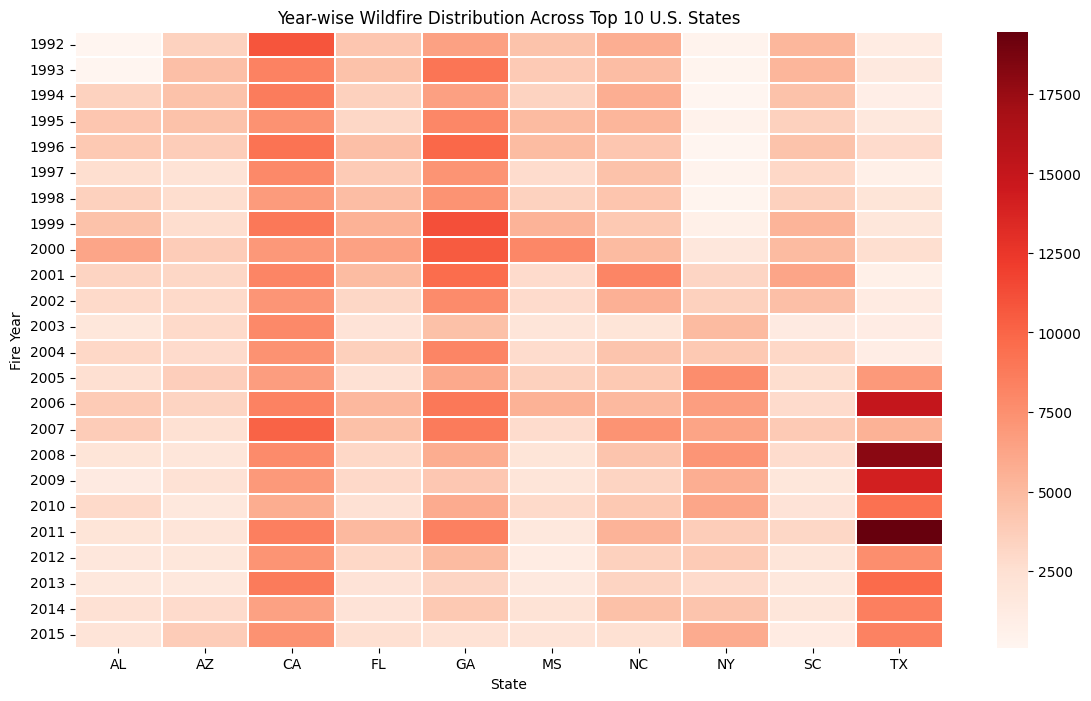

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(
    heatmap_state_year,
    cmap="Reds",
    linewidths=0.1
)

plt.title("Year-wise Wildfire Distribution Across Top 10 U.S. States")
plt.xlabel("State")
plt.ylabel("Fire Year")
plt.show()


# Recent Trends

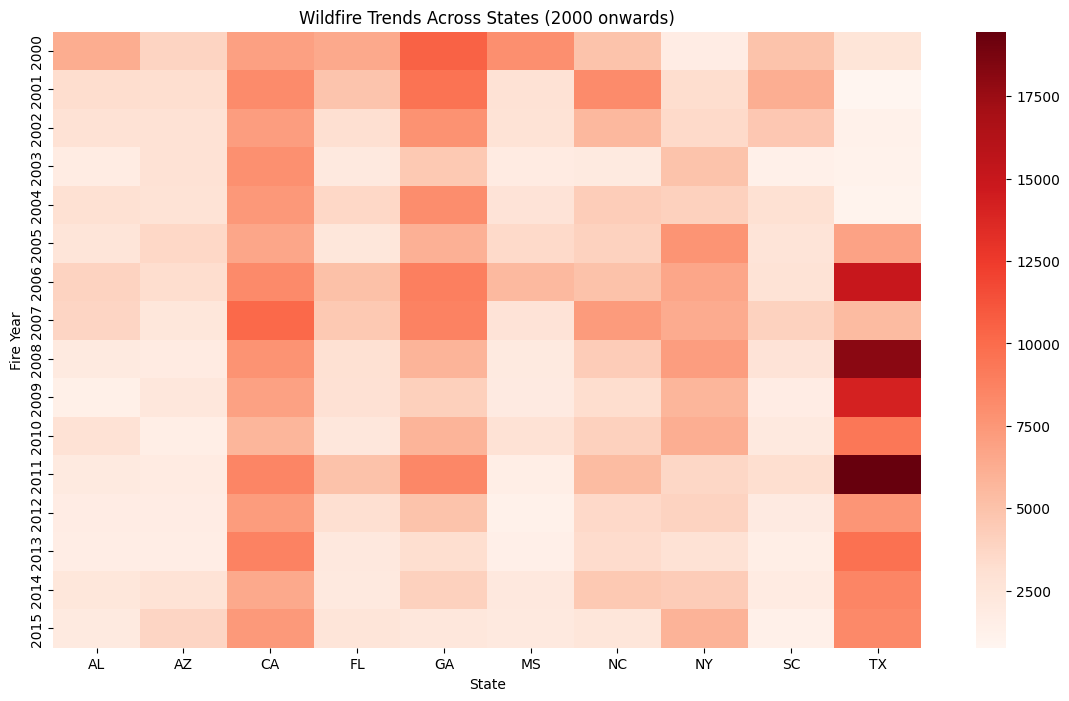

In [19]:
recent_top = fires_top_states[fires_top_states['FIRE_YEAR'] >= 2000]

heatmap_recent = pd.crosstab(
    recent_top['FIRE_YEAR'],
    recent_top['STATE']
)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_recent, cmap="Reds")
plt.title("Wildfire Trends Across States (2000 onwards)")
plt.xlabel("State")
plt.ylabel("Fire Year")
plt.show()


The heatmap indicates that Texas consistently records a high number of wildfires, as shown by the darker red regions across multiple years.
California and New York also show relatively higher wildfire occurrences compared to other states.
In contrast, several states display lighter shades over time, suggesting a gradual reduction in wildfire incidents year by year.